In [32]:
# this code is used to explore some data issues from the dataset in tableau

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline


In [2]:
df = pd.read_csv('2008_edit.csv')
df.head()

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Actual Elapsed Time,Air Time,Arr Delay,Arr Time,CRS Arr Time,CRS Dep Time,CRS Elapsed Time,Date,Total Delay,Dep Hour,...,Dest Country (Airports.Csv1),Origin Country,Dest Iata (Airports.Csv1),Origin Iata,Lat (Airports.Csv1),Lat,Long (Airports.Csv1),Long,Dest State (Airports.Csv1),Origin State
0,204.0,184.0,15.0,1945.0,1930,1710,200.0,1/25/2008,26.0,17.0,...,USA,USA,PHX,MSP,33.434167,44.880547,-112.008056,-93.216922,AZ,MN
1,333.0,284.0,57.0,933.0,836,700,276.0,1/25/2008,57.0,7.0,...,USA,USA,LAX,IND,33.942536,39.717329,-118.408074,-86.294384,CA,IN
2,365.0,304.0,67.0,1232.0,1125,926,299.0,1/25/2008,68.0,9.0,...,USA,USA,LAX,DTW,33.942536,42.212059,-118.408074,-83.348836,CA,MI
3,277.0,218.0,48.0,1354.0,1306,1122,224.0,1/25/2008,43.0,11.0,...,USA,USA,SAN,MSP,32.733556,44.880547,-117.189657,-93.216922,CA,MN
4,333.0,266.0,83.0,1803.0,1640,1430,250.0,1/25/2008,83.0,14.0,...,USA,USA,LAX,MEM,33.942536,35.042417,-118.408074,-89.976667,CA,TN


In [3]:
df.columns

Index(['Actual Elapsed Time', 'Air Time', 'Arr Delay', 'Arr Time',
       'CRS Arr Time', 'CRS Dep Time', 'CRS Elapsed Time', 'Date',
       'Total Delay', 'Dep Hour', 'Cancellation Code', 'Cancelled',
       'Carrier Delay', 'Day Of Week', 'Dayof Month', 'Dep Delay', 'Dep Time',
       'Dest', 'Distance', 'Diverted', 'F1', 'Flight Num',
       'Late Aircraft Delay', 'Month', 'NAS Delay', 'Number of Records',
       'Origin', 'Security Delay', 'Tail Num', 'Taxi In', 'Taxi Out',
       'Unique Carrier', 'Weather Delay', 'Year',
       'Dest Airport (Airports.Csv1)', 'Origin Airport',
       'Dest City (Airports.Csv1)', 'Origin City',
       'Dest Country (Airports.Csv1)', 'Origin Country',
       'Dest Iata (Airports.Csv1)', 'Origin Iata', 'Lat (Airports.Csv1)',
       'Lat', 'Long (Airports.Csv1)', 'Long', 'Dest State (Airports.Csv1)',
       'Origin State'],
      dtype='object')

In [6]:
df['Total Delay'].isna().sum()

154699

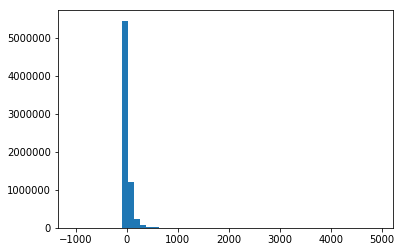

In [12]:
df['Total Delay'].fillna(0, inplace=True)
plt.hist(df['Total Delay'], bins = 50);

In [9]:
df['Total Delay'].describe()

count    7.009728e+06
mean     1.769302e+01
std      7.167869e+01
min     -1.053000e+03
25%     -1.300000e+01
50%     -2.000000e+00
75%      1.700000e+01
max      4.920000e+03
Name: Total Delay, dtype: float64

In [19]:
df['Total Delay'][df['Total Delay'] > 500].sum()

13371485.0

In [25]:
df_outliers = df[df['Total Delay']>1000]

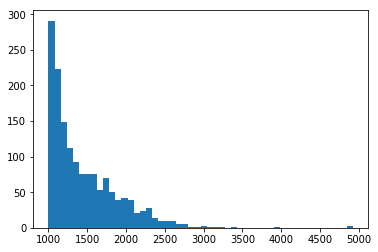

In [26]:
plt.hist(df_outliers['Total Delay'], bins = 50);

In [29]:
df.iloc[df['Total Delay'].idxmax()]

Actual Elapsed Time                                         154
Air Time                                                    132
Arr Delay                                                  2453
Arr Time                                                    858
CRS Arr Time                                               1605
CRS Dep Time                                               1417
CRS Elapsed Time                                            168
Date                                                  4/10/2008
Total Delay                                                4920
Dep Hour                                                      7
Cancellation Code                                           NaN
Cancelled                                                     0
Carrier Delay                                              2436
Day Of Week                                            Thursday
Dayof Month                                                  10
Dep Delay                               

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        2.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 2.000000e+00,
        3.000000e+00, 6.000000e+00, 3.000000e+00, 2.000000e+00,
        4.000000e+00, 1.100000e+01, 7.000000e+00, 8.000000e+00,
        1.600000e+01, 1.900000e+01, 2.600000e+01, 3.500000e+01,
        7.200000e+01, 7.800000e+01, 8.800000e+01, 1.210000e+02,
        1.770000e+02, 2.190000e+02, 3.200000e+02, 4.180000e+02,
        5.760000e+02, 1.145000e+03, 1.531900e+04, 5.516040e+05,
        5.036832e+06, 1.198549e+06, 1.466850e+05, 3.467400e+04,
        1.244100e+04, 5.102000e+03, 2.442000e+03, 1.274000e+03,
        6.090000e+02, 3.660000e+02, 1.96

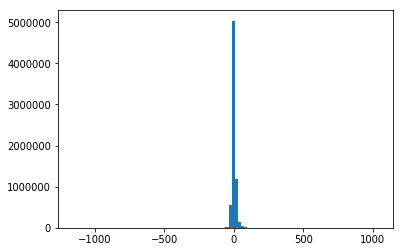

In [34]:
plt.hist(df['Arr Delay'].fillna(0) - df['Dep Delay'].fillna(0), bins=100)

In [33]:
stats.describe(df['Arr Delay'].fillna(0) - df['Dep Delay'].fillna(0))


DescribeResult(nobs=7009728, minmax=(-1154.0, 1034.0), mean=-1.790554925954331, variance=204.2271149199112, skewness=1.3338059370344815, kurtosis=67.79110384634755)

In [37]:
np.median([df['Arr Delay'].fillna(0) - df['Dep Delay'].fillna(0)])

-3.0